In [32]:
from tools import *
import pandas as pd
import numpy as np

In [33]:
data = get_LOBs()

Opening UoB_Set01_2025-01-02LOBs.txt


In [34]:
data[0]

,Exchange,LOB,high_bid,low_ask,mid_price
combined_time,,,,,
2025-01-02 08:00:00.000,Exch0,"[[bid, []], [ask, []]]",NaN,NaN,NaN
2025-01-02 08:00:00.279,Exch0,"[[bid, [[1, 6]]], [ask, []]]",1.0,NaN,NaN
2025-01-02 08:00:01.333,Exch0,"[[bid, [[1, 6]]], [ask, [[800, 1]]]]",1.0,800.0,400.5
2025-01-02 08:00:01.581,Exch0,"[[bid, [[1, 6]]], [ask, [[799, 1]]]]",1.0,799.0,400.0
2025-01-02 08:00:01.643,Exch0,"[[bid, [[1, 6]]], [ask, [[798, 1]]]]",1.0,798.0,399.5
...,...,...,...,...,...
2025-01-02 16:29:59.542,Exch0,"[[bid, [[290, 1], [288, 2], [281, 4], [278, 1]...",290.0,294.0,292.0
2025-01-02 16:29:59.573,Exch0,"[[bid, [[290, 1], [288, 2], [281, 4], [278, 1]...",290.0,294.0,292.0
2025-01-02 16:29:59.635,Exch0,"[[bid, [[290, 1], [288, 2], [281, 4], [278, 1]...",290.0,294.0,292.0


In [35]:
df = data[0]

In [36]:
def list_diff(list1, list2):
    return [x for x in list1 if x not in list2]

c = 0
for i, row in df.iterrows():
    print(i, end = "\r")
    if c == 0:
        pass
    else:
        bid = row["LOB"][0][1]
        ask = row["LOB"][1][1]

        df.at[i, "Incoming bid"] = str(list_diff(bid, prev_bid))
        df.at[i, "Incoming ask"] = str(list_diff(ask, prev_ask))

        df.at[i, "Outgoing bid"] = str(list_diff(prev_bid, bid))
        df.at[i, "Outgoing ask"] = str(list_diff(prev_ask, ask))
        
    c += 1
    prev_bid = row["LOB"][0][1]
    prev_ask = row["LOB"][1][1]

In [37]:
df

,Exchange,LOB,high_bid,low_ask,mid_price,Incoming bid,Incoming ask,Outgoing bid,Outgoing ask
combined_time,,,,,,,,,
2025-01-02 08:00:00.000,Exch0,"[[bid, []], [ask, []]]",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-02 08:00:00.279,Exch0,"[[bid, [[1, 6]]], [ask, []]]",1.0,NaN,NaN,"[[1, 6]]",[],[],[]
2025-01-02 08:00:01.333,Exch0,"[[bid, [[1, 6]]], [ask, [[800, 1]]]]",1.0,800.0,400.5,[],"[[800, 1]]",[],[]
2025-01-02 08:00:01.581,Exch0,"[[bid, [[1, 6]]], [ask, [[799, 1]]]]",1.0,799.0,400.0,[],"[[799, 1]]",[],"[[800, 1]]"
2025-01-02 08:00:01.643,Exch0,"[[bid, [[1, 6]]], [ask, [[798, 1]]]]",1.0,798.0,399.5,[],"[[798, 1]]",[],"[[799, 1]]"
...,...,...,...,...,...,...,...,...,...
2025-01-02 16:29:59.542,Exch0,"[[bid, [[290, 1], [288, 2], [281, 4], [278, 1]...",290.0,294.0,292.0,[],"[[610, 5]]",[],"[[592, 5]]"
2025-01-02 16:29:59.573,Exch0,"[[bid, [[290, 1], [288, 2], [281, 4], [278, 1]...",290.0,294.0,292.0,[],"[[439, 3]]",[],"[[720, 3]]"
2025-01-02 16:29:59.635,Exch0,"[[bid, [[290, 1], [288, 2], [281, 4], [278, 1]...",290.0,294.0,292.0,[],"[[397, 5]]",[],"[[610, 5]]"


In [38]:
tapes = get_Tapes()

Opening UoB_Set01_2025-01-02tapes.csv


In [39]:
tapes[0]

,Price,Volume
combined_time,,
2025-01-02 08:00:10.881,267,1
2025-01-02 08:00:11.067,269,1
2025-01-02 08:00:11.222,267,2
2025-01-02 08:00:12.338,270,2
2025-01-02 08:00:13.733,267,3
...,...,...
2025-01-02 16:29:58.085,287,2
2025-01-02 16:29:58.085,288,2
2025-01-02 16:29:59.108,292,1


In [40]:
tapes[0]["P x V"] = tapes[0]["Price"]*tapes[0]["Volume"]
resampled_tapes = tapes[0].resample('1s').sum()
resampled_tapes["Tapes Price"] = resampled_tapes["P x V"] / resampled_tapes["Volume"]
resampled_tapes.drop(["Price","P x V"], axis = 1, inplace = True)

resampled_tapes

,Volume,Tapes Price
combined_time,,
2025-01-02 08:00:10,1,267.000000
2025-01-02 08:00:11,3,267.666667
2025-01-02 08:00:12,2,270.000000
2025-01-02 08:00:13,3,267.000000
2025-01-02 08:00:14,0,NaN
...,...,...
2025-01-02 16:29:55,0,NaN
2025-01-02 16:29:56,1,286.000000
2025-01-02 16:29:57,0,NaN


In [41]:
new_lob_df = df[["Incoming bid", "Incoming ask", "Outgoing bid", "Outgoing ask"]]#, "mid_price", "low_ask", "high_bid"]]
new_lob_df = new_lob_df.map(lambda x: x[1:-1].replace(",","") if isinstance(x, str) else "")
new_lob_df

,Incoming bid,Incoming ask,Outgoing bid,Outgoing ask
combined_time,,,,
2025-01-02 08:00:00.000,,,,
2025-01-02 08:00:00.279,[1 6],,,
2025-01-02 08:00:01.333,,[800 1],,
2025-01-02 08:00:01.581,,[799 1],,[800 1]
2025-01-02 08:00:01.643,,[798 1],,[799 1]
...,...,...,...,...
2025-01-02 16:29:59.542,,[610 5],,[592 5]
2025-01-02 16:29:59.573,,[439 3],,[720 3]
2025-01-02 16:29:59.635,,[397 5],,[610 5]


In [42]:
resampled_lob = new_lob_df.resample('1s').sum()
resampled_lob_prices = df[["mid_price", "low_ask", "high_bid"]].resample("1s").last()
full_resampled_lob = pd.concat([resampled_lob, resampled_lob_prices], axis = 1)
full_resampled_lob

,Incoming bid,Incoming ask,Outgoing bid,Outgoing ask,mid_price,low_ask,high_bid
combined_time,,,,,,,
2025-01-02 08:00:00,[1 6],,,,NaN,NaN,1.0
2025-01-02 08:00:01,[261 1],[800 1][799 1][798 1][797 1],,[800 1][799 1][798 1],529.0,797.0,261.0
2025-01-02 08:00:02,[262 6],[338 3][297 5],[1 6],,279.5,297.0,262.0
2025-01-02 08:00:03,[263 6][264 6],[296 1][309 3][334 4][292 5][291 1][296 4],[262 6][263 6],[338 3][297 5][797 1][296 1] [309 3],277.5,291.0,264.0
2025-01-02 08:00:04,,[288 5][307 4][287 1] [296 3][287 4][300 4][28...,,[292 5][334 4][296 4][287 1] [296 3][307 4][29...,275.0,286.0,264.0
...,...,...,...,...,...,...,...
2025-01-02 16:29:55,[284 2][275 1] [274 1][270 1][285 2][267 1][15...,[336 5][406 5][401 5][344 5][486 3][295 6],[283 2][275 2][133 9][275 1][284 2][270 1][72 1],[446 4][614 5][336 5][406 5][761 3][295 5],285.5,286.0,285.0
2025-01-02 16:29:56,[272 1][267 5][176 1][66 2][217 1][276 4],[295 3][459 5][492 5][296 1],[274 1][268 4] [267 1][285 2][159 1][176 1][28...,[295 6][344 5][286 1][459 5],285.5,295.0,276.0
2025-01-02 16:29:57,[65 5][80 4][277 1][276 8][269 1] [267 4][278 ...,[290 5][291 2] [295 1][789 5][496 3][290 2][28...,[262 5][276 4] [80 4][267 5][277 1][65 5][66 2...,[492 5][295 3][290 5][486 3][291 2][290 2][496...,283.5,287.0,280.0


In [43]:
full_df = pd.concat([resampled_tapes, full_resampled_lob], axis = 1)
full_df.head()

,Volume,Tapes Price,Incoming bid,Incoming ask,Outgoing bid,Outgoing ask,mid_price,low_ask,high_bid
combined_time,,,,,,,,,
2025-01-02 08:00:10,1.0,267.000000,[193 15][267 5],[275 8] [277 2][584 3][269 1][268 1],[178 15][267 6],[275 3] [277 7][272 1][270 1][268 1],268.0,269.0,267.0
2025-01-02 08:00:11,3.0,267.666667,[118 10][267 3][96 10][46 10],[281 6][274 3] [275 5][270 5][464 3][273 3][30...,[267 5][118 10][96 10],[277 2] [281 4][269 1][275 8][271 5][584 3][27...,268.5,270.0,267.0
2025-01-02 08:00:12,2.0,270.000000,[92 10][127 1][264 1][181 1],[744 3][270 3][280 4] [281 2],[46 10][259 1][127 1],[308 3][270 5][281 6],268.5,270.0,267.0
2025-01-02 08:00:13,3.0,267.000000,,[269 3][282 2][268 3][278 4],[267 3],[270 3][281 2][269 3][268 3][280 4],268.5,273.0,264.0
2025-01-02 08:00:14,0.0,NaN,[10 10],[272 5][296 3][271 5][423 5][270 3][644 5][376...,[92 10],[744 3][272 5][273 3][423 5][279 5] [282 2],267.0,270.0,264.0


In [44]:
full_df[full_df["Volume"]  >= 0].iloc[15000:15010]

,Volume,Tapes Price,Incoming bid,Incoming ask,Outgoing bid,Outgoing ask,mid_price,low_ask,high_bid
combined_time,,,,,,,,,
2025-01-02 12:10:10,0.0,NaN,[251 1][280 5],[307 3][307 6][309 5],[281 2][137 1],[307 7][307 3][312 5],300.5,303.0,298.0
2025-01-02 12:10:11,0.0,NaN,[299 3][300 3][283 5][282 2],[708 4][597 4][698 2][440 2][664 4],[284 15][227 3][299 3][280 5],[434 4][708 4][784 2][698 2][597 4],301.5,303.0,300.0
2025-01-02 12:10:12,0.0,NaN,[291 16][283 6][260 1][144 1],[699 3][581 2][302 4][784 3][492 3],[291 6][283 5] [259 1][58 1][260 1][251 1],[548 3][440 2][303 4][699 3][784 3],301.0,302.0,300.0
2025-01-02 12:10:13,0.0,NaN,[75 2][2 1][153 2][283 5] [18 1][293 1][99 2],[627 4][301 4][313 5][313 8][307 3] [309 3][42...,[144 1][75 2][293 2][283 6][153 2],[664 4][302 4][309 5][306 3] [313 5][307 6][58...,300.5,301.0,300.0
2025-01-02 12:10:14,8.0,298.75,[298 1][291 11],[305 4][336 2][649 4],[300 3][298 6][2 1][291 16],[627 4][301 4][422 2][305 4],302.5,307.0,298.0
2025-01-02 12:10:15,0.0,NaN,[161 2][84 1][218 2],[514 4][671 4][306 1],[287 7][18 1][161 2],[649 4][514 4],302.0,306.0,298.0
2025-01-02 12:10:16,0.0,NaN,[148 2][296 1][292 2][291 1] [121 10][219 1][2...,[357 2][310 3][311 5] [313 3][305 1][313 6][31...,[218 2][84 1][148 2][291 11][296 1][298 1],[336 2][309 3][313 8][306 1][307 3] [313 3][31...,299.0,305.0,293.0
2025-01-02 12:10:17,0.0,NaN,[290 2][157 2][28 2][212 2][125 2][218 10][221...,[702 4][501 3][304 1][507 2],[99 2][292 2][157 2][290 2][212 2][219 1] [121...,[357 2][671 4][492 3][305 1],298.5,304.0,293.0
2025-01-02 12:10:18,0.0,NaN,[122 4][24 2][294 4][32 4][295 4][177 10][296 ...,[797 4][309 5] [310 3][303 1][306 3] [313 3][3...,[125 2][122 4][294 4][254 10][295 4][221 2][28...,[702 4][310 8][304 1][313 6][309 5][501 3],299.5,303.0,296.0


In [45]:
full_df.to_csv("Processed_Data/Clean_Day_0_data.csv")

MSE:  357.75839302969456
MAE:  6.342973550157957


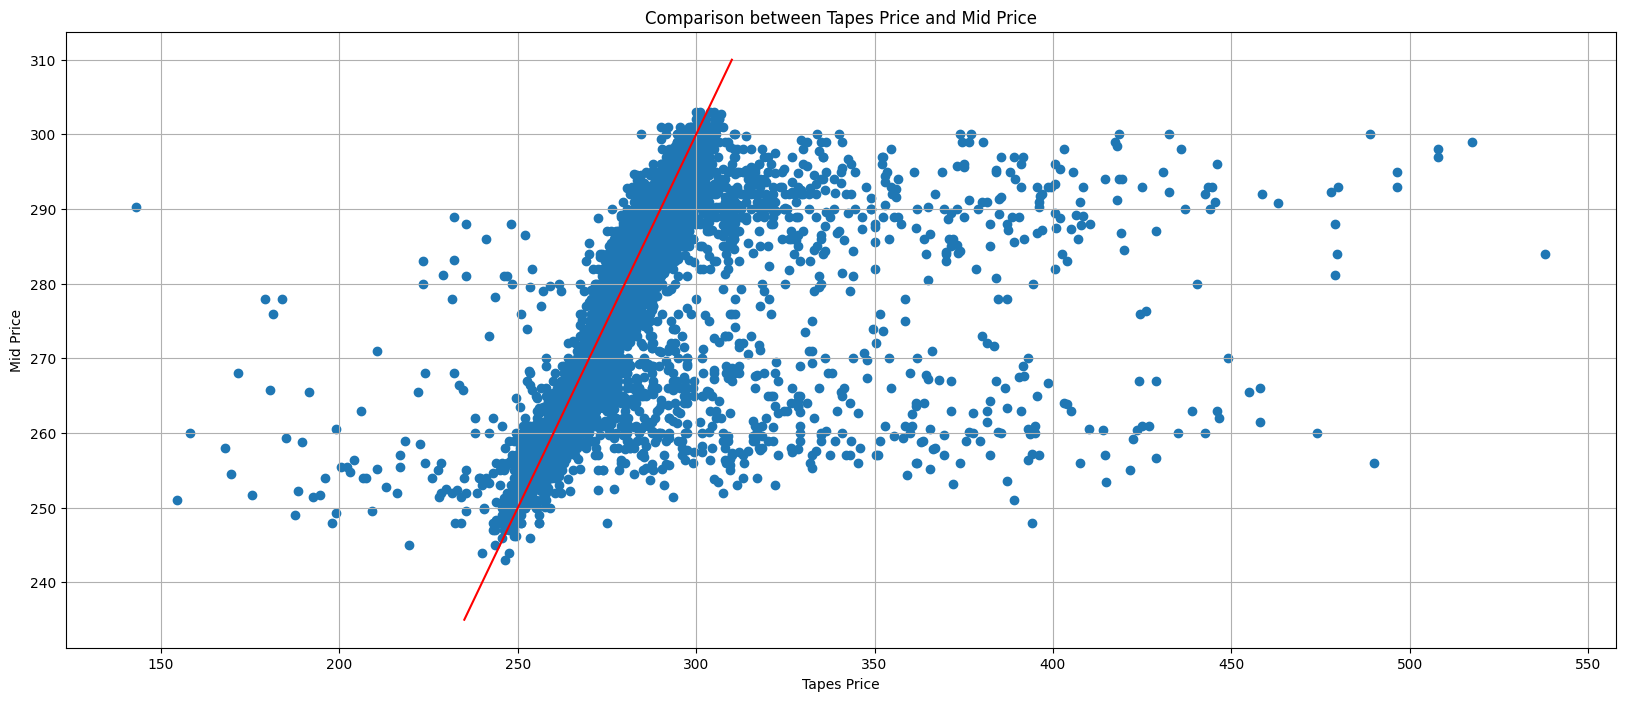

In [66]:
plt.figure(figsize=(20,8))
plt.scatter(full_df["mid_price"], full_df["Tapes Price"])

# Plot the y=x line in red
plt.plot([235, 310], [235, 310], 'r')

# Calculate and print MSE and MAE
print("MSE: ", np.mean((full_df["Tapes Price"] - full_df["mid_price"])**2))
print("MAE: ", np.mean(abs(full_df["Tapes Price"] - full_df["mid_price"])))

# Add labels and title
plt.xlabel('Tapes Price')
plt.ylabel('Mid Price')
plt.title('Comparison between Tapes Price and Mid Price')

# Show the plot
plt.grid(True)
plt.show()
